1. Write a python class for PID controller.
2. Write a python class fopr vehicle model including throttle and friction(deacceraltion).
3. Write a python code to simulate the vehicle which conrtols friction and resistance and vehicle speed.

In [1]:
import time

class PIDController:
    def __init__(self, kp, ki, kd, setpoint=0, output_limits=(None, None)):
        """
        Initialize a PID controller.
        
        :param kp: Proportional gain
        :param ki: Integral gain
        :param kd: Derivative gain
        :param setpoint: Desired setpoint
        :param output_limits: Tuple (min, max) for output limits
        """
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.setpoint = setpoint
        self.output_limits = output_limits
        
        self._previous_error = 0
        self._integral = 0
        self._last_time = None

    def compute(self, feedback_value, current_time):
        """
        Compute the PID output based on the feedback value.
        
        :param feedback_value: Measured process variable
        :param current_time: Current time in seconds
        :return: Control output
        """
        error = self.setpoint - feedback_value
        delta_time = current_time - self._last_time if self._last_time is not None else 0
        
        if delta_time > 0:
            self._integral += error * delta_time
            derivative = (error - self._previous_error) / delta_time
        else:
            derivative = 0
        
        output = (self.kp * error) + (self.ki * self._integral) + (self.kd * derivative)
        
        # Apply output limits
        if self.output_limits[0] is not None:
            output = max(self.output_limits[0], output)
        if self.output_limits[1] is not None:
            output = min(self.output_limits[1], output)
        
        self._previous_error = error
        self._last_time = current_time
        
        return output

# Test Implementation
if __name__ == "__main__":
    pid = PIDController(kp=1.0, ki=0.1, kd=0.05, setpoint=10, output_limits=(0, 100))
    feedback = 0
    
    for i in range(1, 21):
        current_time = time.time()
        output = pid.compute(feedback, current_time)
        feedback += output * 0.1  # Simulating process response
        print(f"Step {i}: Output = {output:.2f}, Feedback = {feedback:.2f}")
        time.sleep(0.5)


Step 1: Output = 10.00, Feedback = 1.00
Step 2: Output = 9.35, Feedback = 1.94
Step 3: Output = 8.83, Feedback = 2.82
Step 4: Output = 8.31, Feedback = 3.65
Step 5: Output = 7.81, Feedback = 4.43
Step 6: Output = 7.31, Feedback = 5.16
Step 7: Output = 6.83, Feedback = 5.85
Step 8: Output = 6.36, Feedback = 6.48
Step 9: Output = 5.91, Feedback = 7.07
Step 10: Output = 5.47, Feedback = 7.62
Step 11: Output = 5.05, Feedback = 8.12
Step 12: Output = 4.64, Feedback = 8.59
Step 13: Output = 4.25, Feedback = 9.01
Step 14: Output = 3.88, Feedback = 9.40
Step 15: Output = 3.53, Feedback = 9.75
Step 16: Output = 3.19, Feedback = 10.07
Step 17: Output = 2.87, Feedback = 10.36
Step 18: Output = 2.57, Feedback = 10.62
Step 19: Output = 2.28, Feedback = 10.85
Step 20: Output = 2.02, Feedback = 11.05


Simulation data saved to simulation_data.csv
Simulation plot saved as simulation_plot.png


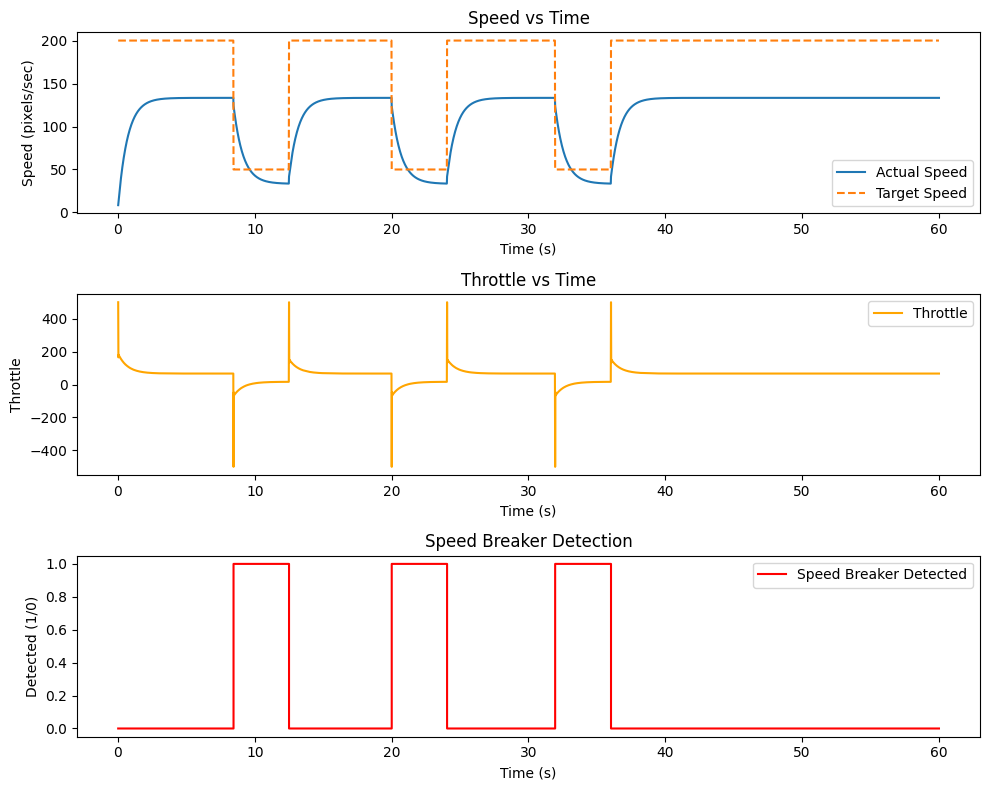

Simulation plot saved as simulation_plot.png


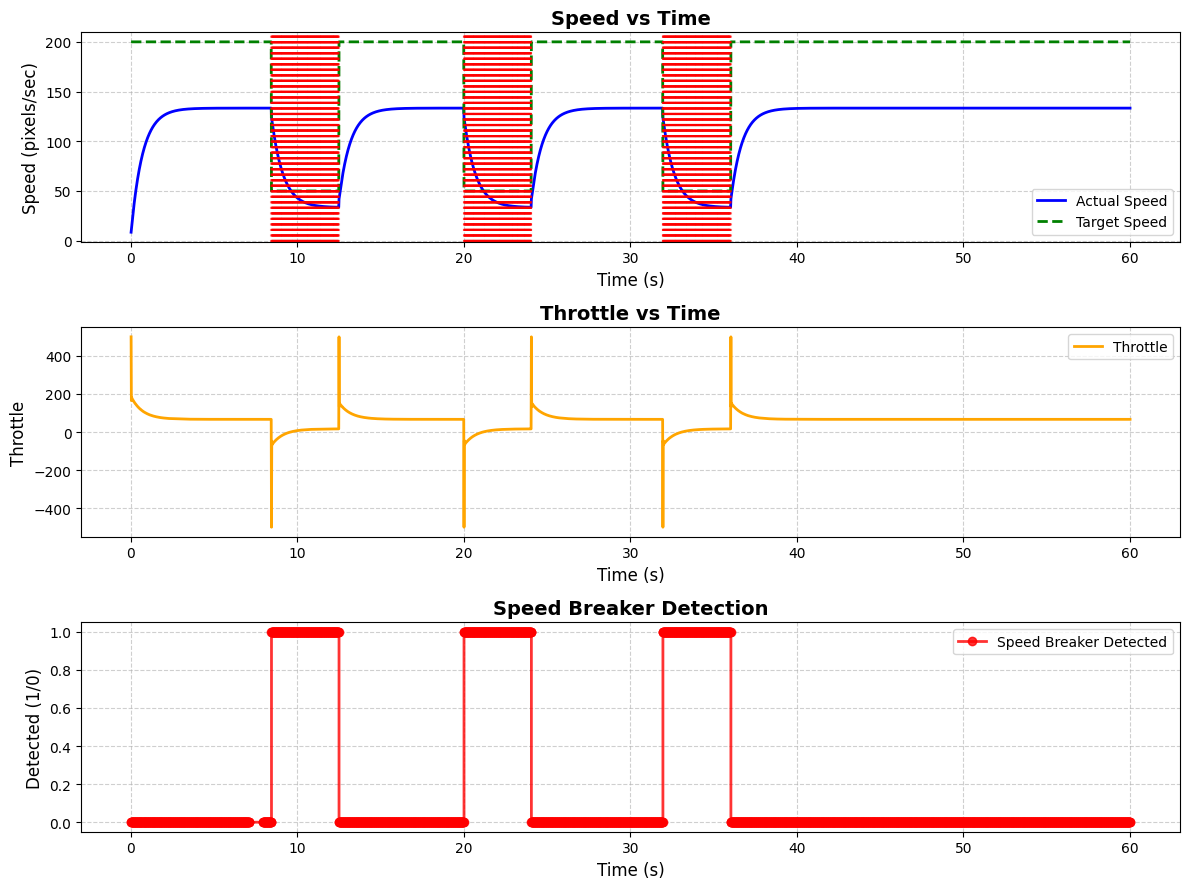

In [6]:
import pygame
import random
import matplotlib.pyplot as plt
import csv

# --- PID Controller Class ---
class PIDController:
    def __init__(self, kp, ki, kd):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.integral = 0
        self.last_error = 0

    def update(self, error, dt):
        self.integral += error * dt
        derivative = (error - self.last_error) / dt if dt > 0 else 0
        output = self.kp * error + self.ki * self.integral + self.kd * derivative
        self.last_error = error
        return output

# --- Vehicle Class ---
class Vehicle:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.width = 50
        self.height = 30
        self.speed = 0
        self.target_speed = 200
        self.max_acceleration = 500
        self.friction_coeff = 0.5
        self.pid = PIDController(kp=1.0, ki=0, kd=0.05)
        self.last_throttle = 0

    def update(self, dt, target_speed):
        self.target_speed = target_speed
        error = self.target_speed - self.speed
        throttle = self.pid.update(error, dt)
        throttle = max(-self.max_acceleration, min(self.max_acceleration, throttle))
        self.last_throttle = throttle
        acceleration = throttle - self.friction_coeff * self.speed
        self.speed += acceleration * dt
        if self.speed < 0:
            self.speed = 0

    def draw(self, screen):
        pygame.draw.rect(screen, (0, 0, 255), (self.x, self.y, self.width, self.height))

# --- Speed Breaker Class ---
class SpeedBreaker:
    def __init__(self, x, y, width=50, height=10):
        self.x = x
        self.y = y
        self.width = width
        self.height = height

    def update(self, vehicle_speed, dt):
        self.x -= vehicle_speed * dt

    def draw(self, screen):
        pygame.draw.rect(screen, (255, 0, 0), (self.x, self.y, self.width, self.height))

# --- Main Simulation Loop ---
def main():
    pygame.init()
    WIDTH, HEIGHT = 800, 600
    screen = pygame.display.set_mode((WIDTH, HEIGHT))
    pygame.display.set_caption("Car Simulation")
    clock = pygame.time.Clock()

    road_y = 500
    vehicle = Vehicle(x=100, y=road_y - 30)
    obstacles = [SpeedBreaker(WIDTH + random.randint(200, 600), road_y)]
    total_speed_breakers_spawned = 1
    
    time_data, speed_data, target_speed_data, throttle_data, speed_breaker_data = [], [], [], [], []
    sim_time = 0
    simulation_duration = 60
    running = True

    while running:
        dt = clock.tick(60) / 1000.0
        sim_time += dt

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
        if sim_time >= simulation_duration:
            running = False

        detection_range = 200
        target_speed = 200
        speed_breaker_detected = 0
        for obs in obstacles:
            if 0 < obs.x - vehicle.x < detection_range:
                target_speed = 50
                speed_breaker_detected = 1
                break

        vehicle.update(dt, target_speed)
        for obs in obstacles:
            obs.update(vehicle.speed, dt)
        obstacles = [obs for obs in obstacles if obs.x + obs.width > 0]

        if total_speed_breakers_spawned < 3 and not obstacles:
            obstacles.append(SpeedBreaker(WIDTH + random.randint(200, 600), road_y))
            total_speed_breakers_spawned += 1

        time_data.append(sim_time)
        speed_data.append(vehicle.speed)
        target_speed_data.append(vehicle.target_speed)
        throttle_data.append(vehicle.last_throttle)
        speed_breaker_data.append(speed_breaker_detected)

        screen.fill((135, 206, 235))
        pygame.draw.rect(screen, (50, 50, 50), (0, road_y, WIDTH, HEIGHT - road_y))
        vehicle.draw(screen)
        for obs in obstacles:
            obs.draw(screen)
        font = pygame.font.SysFont("Arial", 20)
        speed_text = font.render(f"Speed: {vehicle.speed:.2f}", True, (255, 255, 255))
        screen.blit(speed_text, (10, 10))
        pygame.display.flip()

    pygame.quit()

    with open("simulation_data.csv", mode='w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Time", "Speed", "Target Speed", "Throttle", "Speed Breaker Detected"])
        for i in range(len(time_data)):
            writer.writerow([time_data[i], speed_data[i], target_speed_data[i], throttle_data[i], speed_breaker_data[i]])
    print("Simulation data saved to simulation_data.csv")

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))
    ax1.plot(time_data, speed_data, label="Actual Speed")
    ax1.plot(time_data, target_speed_data, label="Target Speed", linestyle="--")
    ax1.set_title("Speed vs Time")
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel("Speed (pixels/sec)")
    ax1.legend()

    ax2.plot(time_data, throttle_data, label="Throttle", color="orange")
    ax2.set_title("Throttle vs Time")
    ax2.set_xlabel("Time (s)")
    ax2.set_ylabel("Throttle")
    ax2.legend()

    ax3.step(time_data, speed_breaker_data, label="Speed Breaker Detected", where='post', color="red")
    ax3.set_title("Speed Breaker Detection")
    ax3.set_xlabel("Time (s)")
    ax3.set_ylabel("Detected (1/0)")
    ax3.legend()

    plt.tight_layout()
    plt.savefig("simulation_plot.png")
    print("Simulation plot saved as simulation_plot.png")
    plt.show()

    # Plot the simulation data
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 9), dpi=100)

    # Speed vs Time
    ax1.plot(time_data, speed_data, label="Actual Speed", color="blue", linewidth=2)
    ax1.plot(time_data, target_speed_data, label="Target Speed", linestyle="--", color="green", linewidth=2)
    ax1.set_title("Speed vs Time", fontsize=14, fontweight="bold")
    ax1.set_xlabel("Time (s)", fontsize=12)
    ax1.set_ylabel("Speed (pixels/sec)", fontsize=12)
    ax1.legend(fontsize=10)
    ax1.grid(True, linestyle="--", alpha=0.6)

    # Mark speed breakers on speed graph
    for i, detected in enumerate(speed_breaker_data):
        if detected:
            ax1.axvline(x=time_data[i], color="red", linestyle=":", alpha=0.5)

    # Throttle vs Time
    ax2.plot(time_data, throttle_data, label="Throttle", color="orange", linewidth=2)
    ax2.set_title("Throttle vs Time", fontsize=14, fontweight="bold")
    ax2.set_xlabel("Time (s)", fontsize=12)
    ax2.set_ylabel("Throttle", fontsize=12)
    ax2.legend(fontsize=10)
    ax2.grid(True, linestyle="--", alpha=0.6)

    # Speed Breaker Detection
    ax3.step(time_data, speed_breaker_data, label="Speed Breaker Detected", where='post', color="red", linewidth=2, marker="o", alpha=0.8)
    ax3.set_title("Speed Breaker Detection", fontsize=14, fontweight="bold")
    ax3.set_xlabel("Time (s)", fontsize=12)
    ax3.set_ylabel("Detected (1/0)", fontsize=12)
    ax3.legend(fontsize=10)
    ax3.grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.savefig("simulation_plot.png", bbox_inches="tight")
    print("Simulation plot saved as simulation_plot.png")
    plt.show()

if __name__ == "__main__":
    main()